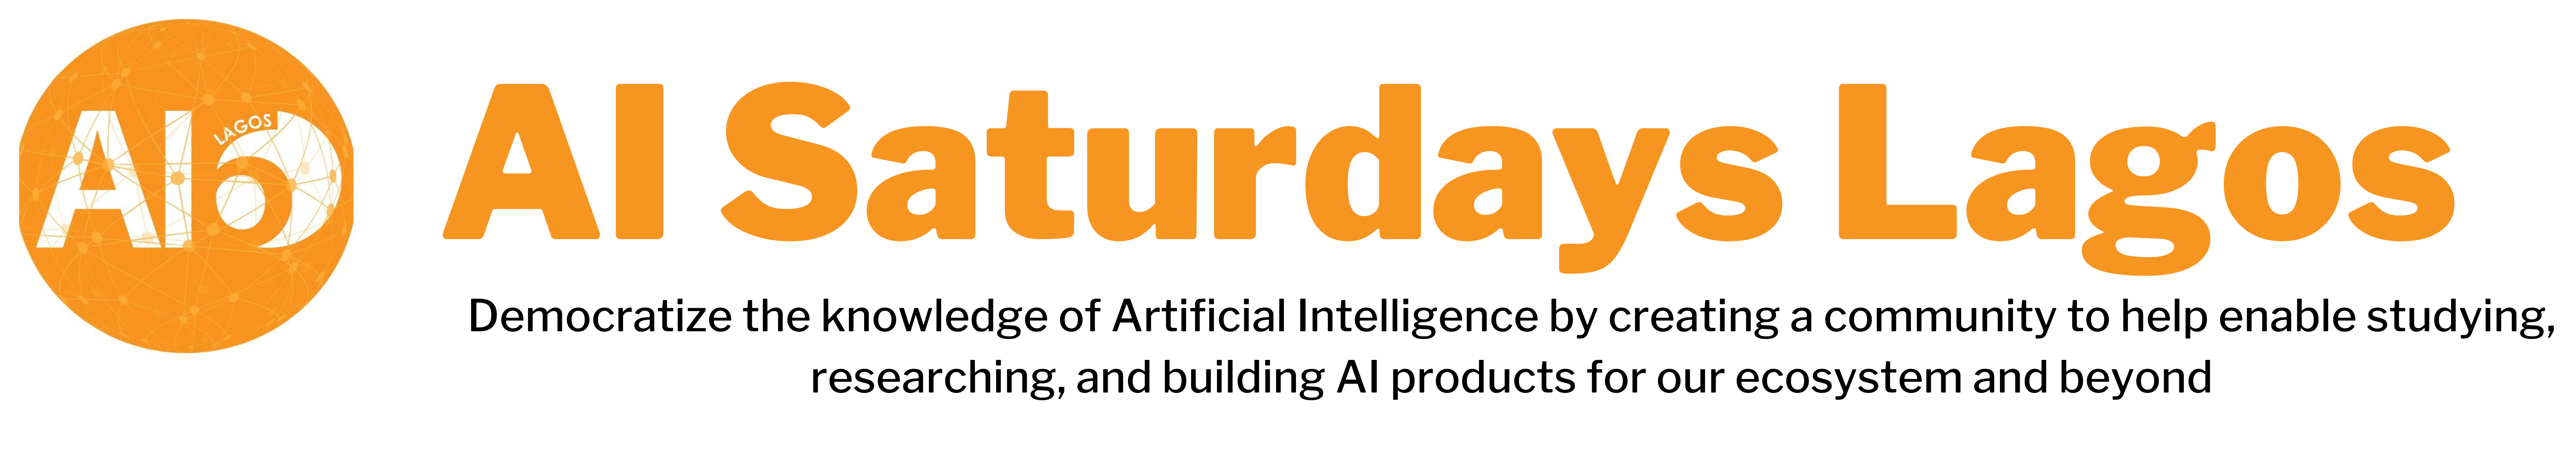

# Assignment Submission Details

* You are required to submit a completed copy of this notebook and a Medium article.
* Create a [Medium account](https://medium.com/) if you don't already have
* Data visualization is storytelling hence, you would need to write detailed article on Medium that tells the story of your Exploration and Visulization of the 2023 World Population Dataset.
* 70% of grades will be allocated to your written Medium article and 30% to your complete notebook analysis.
* Your Medium article should include the steps you took during this assignment and the insights you gained from the dataset.

We provide article template in subsection below. If you have any questions, make sure to drop them on discord, tagging your lab instructor.


**Deadline: 8th of October, 2023. 11:59pm WAT.**

## World Population by Country 2023 Dataset

This notebook uses the [2023 World Population](https://www.kaggle.com/datasets/joebeachcapital/world-population-by-country-2023) dataset available on Kaggle.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import json
import requests
import folium

In [2]:
world_population_data = pd.read_csv('WorldPopulation2023.csv')
world_population_data.head()

Rank         Country  Population2023 YearlyChange  NetChange  \
0    36     Afghanistan        42239854       2.70 %    1111083   
1   138         Albania         2832439      -0.35 %      -9882   
2    34         Algeria        45606480       1.57 %     703255   
3   212  American Samoa           43914      -0.81 %       -359   
4   202         Andorra           80088       0.33 %        264   

   Density(P/Km²)  Land Area(Km²)  Migrants(net)  Fert.Rate  MedianAge  \
0              65          652860         -65846        4.4       17.0   
1             103           27400          -8000        1.4       38.0   
2              19         2381740          -9999        2.8       28.0   
3             220             200           -790        2.2       29.0   
4             170             470            200        1.1       43.0   

  UrbanPop% WorldShare  
0      26 %     0.53 %  
1      67 %     0.04 %  
2      75 %     0.57 %  
3      N.A.     0.00 %  
4      85 %     0.00 %

## Data Dictionary


| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Country(or dependency)            | character | Country/Dependent Territories                                                      |
| Population (2023)       | numeric | Country's Population as at September 2023                                            |
| Yearly change         | character   | Yearly change in population over time in Percentage                                              |
| Net Change        | numeric   | Total yearly change                                           |
| Density           | numeric | Population Density in a unit area                                                       |
| Land Area       | numeric | Country's Land Area                                        |
| Migrants           | numeric | The number of people leaving a country compared to those entering the country. A negative value shows more people leave the country then those that come in.|
| Fert Rate          | numeric | Country's Fertility rate                                                       |
| Med Age | numeric | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Urban Pop%         | character | Percentage Population in the Urban areas                                 |
| World share%  | character | Percentage of the world's population the country's population covers.                                    |


## Exploratory Data Analysis (EDA)

In [3]:
world_population_data.dtypes

Rank                int64
Country            object
Population2023      int64
YearlyChange       object
NetChange           int64
Density(P/Km²)      int64
Land Area(Km²)      int64
Migrants(net)       int64
Fert.Rate         float64
MedianAge         float64
UrbanPop%          object
WorldShare         object
dtype: object

In [4]:
world_population_data.shape

(234, 12)

In [5]:
world_population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


In [6]:
world_population_data.describe()

Rank  Population2023     NetChange  Density(P/Km²)  \
count  234.000000    2.340000e+02  2.340000e+02      234.000000   
mean   117.500000    3.437565e+07  3.000230e+05      477.414530   
std     67.694165    1.373861e+08  1.001815e+06     2320.693692   
min      1.000000    5.180000e+02 -2.957105e+06        0.000000   
25%     59.250000    4.696482e+05  2.360000e+02       38.250000   
50%    117.500000    5.643895e+06  2.860150e+04       96.500000   
75%    175.750000    2.324537e+07  2.236855e+05      242.000000   
max    234.000000    1.428628e+09  1.145449e+07    24360.000000   

       Land Area(Km²)  Migrants(net)   Fert.Rate   MedianAge  
count    2.340000e+02   2.340000e+02  233.000000  233.000000  
mean     5.559568e+05   1.301282e+01    2.414163   31.309013  
std      1.691024e+06   1.698334e+05    1.155913    9.628386  
min      0.000000e+00  -9.104750e+05    0.800000   15.000000  
25%      2.650000e+03  -9.776750e+03    1.600000   22.000000  
50%      7.972000e+04  -5.000000e+02    2.000000   32.000000  
75%      4.070800e+05   4.750000e+02    3.000000   40.000000  
max      1.637687e+07   1.784718e+06    6.700000   54.000000

In [7]:
world_population_data.isna().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [8]:
obj_columns = ['UrbanPop%','WorldShare','YearlyChange']
for col in obj_columns:
    mis = world_population_data[col][world_population_data[col] == 'N.A.'].count()
    print(f'Total samples with N.A in {col} are {mis}')

Total samples with N.A in UrbanPop% are 18
Total samples with N.A in WorldShare are 0
Total samples with N.A in YearlyChange are 0


In [9]:
world_population_data['Country'].is_unique

True

In [10]:
duplicated = world_population_data.duplicated()
duplicated.sum()

0

## Data Preprocessing and Cleaning

In [11]:
def clean_type(df,col):
    df[col] = df[col].map(lambda row: float(row[:-1]))
    return df
def clean_missing(df,col):
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)
    return df
def warngle_data(dataframe):
    for column in obj_columns:
        dataframe = clean_type(dataframe, column)
    for column in missing_col:
        dataframe = clean_missing(dataframe, column)
    return dataframe
world_population_data['UrbanPop%'] = world_population_data['UrbanPop%'].replace('N.A.', np.nan)
obj_columns = ['UrbanPop%','WorldShare','YearlyChange']
missing_col = ['UrbanPop%','WorldShare','YearlyChange','Fert.Rate']
warngle_data(world_population_data)


TypeError: 'float' object is not subscriptable

In [12]:
world_population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       216 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


### Insights:
* What are the top 10 most populated countries?
* What are the least 10 populated countries?
* Using an heatmap, visualize the correlation between the numeric features in the dataset i.e `data.corr(numeric_only=True)`
* What is the relationship between the following features:
    - Migrants vs. Population Density
    - Median Age and Yearly Change
    - Fertility Rate and Yearly Change
* Compulsorily include three more insights/questions to explore
* Your visualization must utilize as least 2 of the following visualization libraries; matplotlib, seaborn, plotly
* You must document your findings below every plot you make using markdown cells. See [Code and Markdown Cells in Jupyter Notebook](https://www.earthdatascience.org/courses/intro-to-earth-data-science/open-reproducible-science/jupyter-python/code-markdown-cells-in-jupyter-notebook/).
* Provide links to resources your made use of while resolving this tasks (at least 3)

In [ ]:
url ="http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
world_geo = requests.get(url).json()
world_map = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world_geo,
    data=world_population_data,
    columns=['Country', 'Population2023'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    nan_fill_color="white",
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='World').add_to(world_map)
world_map

In [14]:
toppol = world_population_data.sort_values(by=['Population2023'],ascending=False)[:10]
toppol.loc[:,['Country','Population2023']]

Country  Population2023
95           India      1428627663
42           China      1425671352
223  United States       339996563
96       Indonesia       277534122
157       Pakistan       240485658
150        Nigeria       223804632
27          Brazil       216422446
16      Bangladesh       172954319
169         Russia       144444359
132         Mexico       128455567

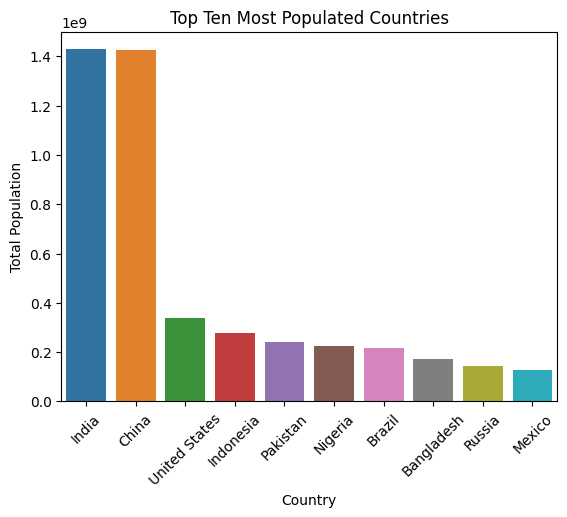

In [19]:
sns.barplot(x="Country", y="Population2023", data=toppol)
plt.title("Top Ten Most Populated Countries")
plt.ylabel("Total Population")
plt.xlabel("Country")
# Rotate x-labels
plt.xticks(rotation=45) 
# Show the plot
plt.show()

In [20]:
leat_pol = world_population_data.sort_values(by=['Population2023'])[:10]
leat_pol.loc[:,['Country','Population2023']]

Country  Population2023
90                  Holy See             518
210                  Tokelau            1893
151                     Niue            1935
68          Falkland Islands            3791
138               Montserrat            4386
173             Saint Helena            5314
177  Saint Pierre & Miquelon            5840
172         Saint Barthelemy           10994
217                   Tuvalu           11396
229          Wallis & Futuna           11502

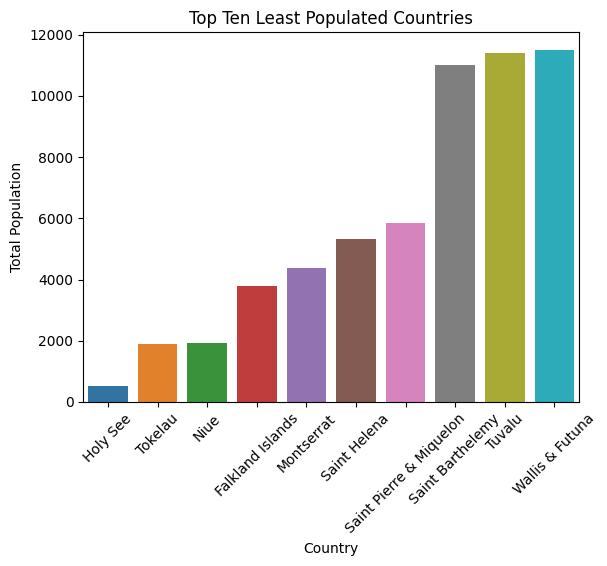

In [21]:
sns.barplot(x="Country", y="Population2023", data=leat_pol)
plt.title("Top Ten Least Populated Countries")
plt.ylabel("Total Population")
plt.xlabel("Country")
# Rotate x-labels
plt.xticks(rotation=45) 
# Show the plot
plt.show()

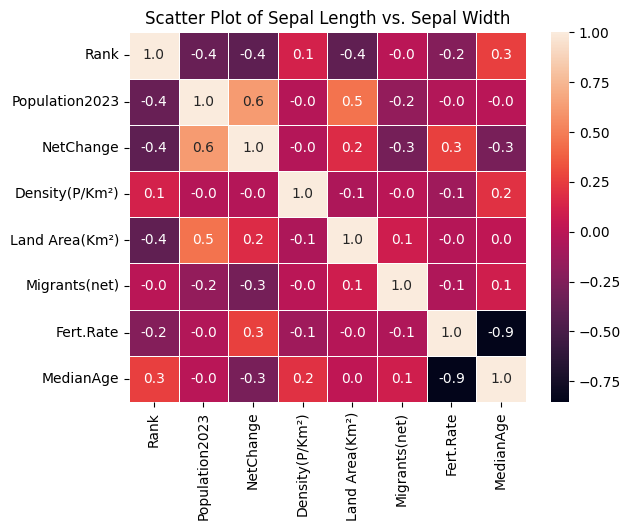

In [ ]:
numeric_corr = world_population_data.corr(numeric_only=True)
sns.heatmap(data= numeric_corr, annot= True,fmt=".1f", linewidth=.5)

# Set the title using Matplotlib's set_title method
ax = plt.gca()
ax.set_title("Scatter Plot of Sepal Length vs. Sepal Width")

# Show the plot
plt.show()

<Axes: xlabel='Migrants(net)', ylabel='Density(P/Km²)'>

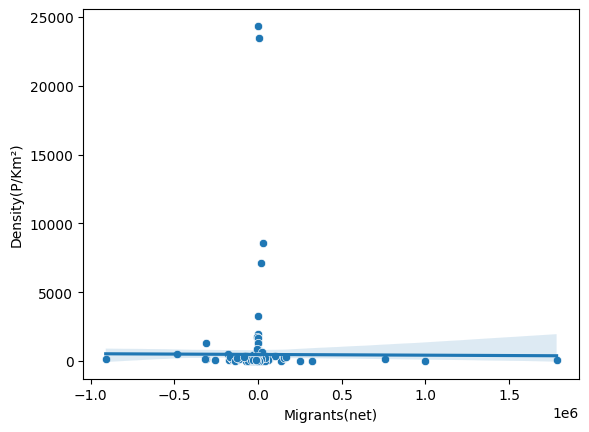

In [ ]:
data = world_population_data[['Migrants(net)','Density(P/Km²)']]
sns.scatterplot(data= data, x='Migrants(net)', y='Density(P/Km²)')
sns.regplot(x='Migrants(net)', y='Density(P/Km²)', data=data, scatter=False, ax=plt.gca())


### TODO
* Include 3 or 4 of your observations in the `Comments` below after exploring and visualizing the dataset

### Comments
*